## Часть 1. Общие задачи по Python
### 1.1.Преобразовать JSON-файл в CSV-файл

In [1]:
import json
import csv
with open('sales.json', 'r') as jsonFile, open('sales.csv', 'w', newline = '') as csvFile:
    jsonReader = json.load(jsonFile)
    csvWriter = csv.writer(csvFile)
    csvWriter.writerow(['item','country','year','sales'])
    for item in jsonReader:
        for country in item["sales_by_country"]:
            for year in item ["sales_by_country"][country].items():
                csvWriter.writerow([item["item"], country, year[0],year[1]])

### 1.2 Выкачать информацию по курсам валют используя REST-API. Визуализировать на графике и сохранить.

In [2]:
import requests
import datetime
import xml

In [3]:
currDate = datetime.datetime.today().strftime('%d/%m/%Y')
print(currDate)

28/11/2021


**Запрос Долларов**

In [4]:

req = requests.get(f'http://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2021&date_req2={currDate}&VAL_NM_RQ=R01235')
doc = xml.dom.minidom.parseString(req.text)
usdTree = doc.getElementsByTagName('Record')

**Запрос Евро**

In [5]:
req = requests.get(f'http://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2021&date_req2={currDate}&VAL_NM_RQ=R01239')
doc = xml.dom.minidom.parseString(req.text)
euroTree = doc.getElementsByTagName('Record')

**Запрос Японской иены**

In [6]:
req = requests.get(f'http://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2021&date_req2={currDate}&VAL_NM_RQ=R01820')
doc = xml.dom.minidom.parseString(req.text)
uenaTree = doc.getElementsByTagName('Record')

**Запрос Украинской гривны**

In [7]:
req = requests.get(f'http://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2021&date_req2={currDate}&VAL_NM_RQ=R01720')
doc = xml.dom.minidom.parseString(req.text)
grivnaTree = doc.getElementsByTagName('Record')

**Парсинг xml и создание csv**

In [8]:
Date = []
usdValue = []
for elem in usdTree:
    Date.append(datetime.datetime.strptime(elem.getAttribute('Date'),'%d.%m.%Y').date())
    val = float(elem.getElementsByTagName('Value')[0].firstChild.nodeValue.replace(',','.',-1))
    nom = float(elem.getElementsByTagName('Nominal')[0].firstChild.nodeValue)
    usdValue.append(val/nom)

In [9]:
euroValue = []
for elem in euroTree:
    val = float(elem.getElementsByTagName('Value')[0].firstChild.nodeValue.replace(',','.',-1))
    nom = float(elem.getElementsByTagName('Nominal')[0].firstChild.nodeValue)
    euroValue.append(val/nom)

In [10]:
uenaValue = []
for elem in uenaTree:
    val = float(elem.getElementsByTagName('Value')[0].firstChild.nodeValue.replace(',','.',-1))
    nom = float(elem.getElementsByTagName('Nominal')[0].firstChild.nodeValue)
    uenaValue.append(val/nom)

In [11]:
grivnaValue = []
for elem in grivnaTree:
    val = float(elem.getElementsByTagName('Value')[0].firstChild.nodeValue.replace(',','.',-1))
    nom = float(elem.getElementsByTagName('Nominal')[0].firstChild.nodeValue)
    grivnaValue.append(val/nom)

In [12]:
with open('courses.csv', 'w', newline = '') as csvFile:
    csvWriter = csv.writer(csvFile)
    csvWriter.writerow(['date','usd','eu','yen','uah'])
    for i in range(len(Date)):
        csvWriter.writerow([Date[i], usdValue[i], euroValue[i], uenaValue[i],grivnaValue[i]])

**Отрисовка полученных данных**

In [13]:
import matplotlib.pyplot as plt

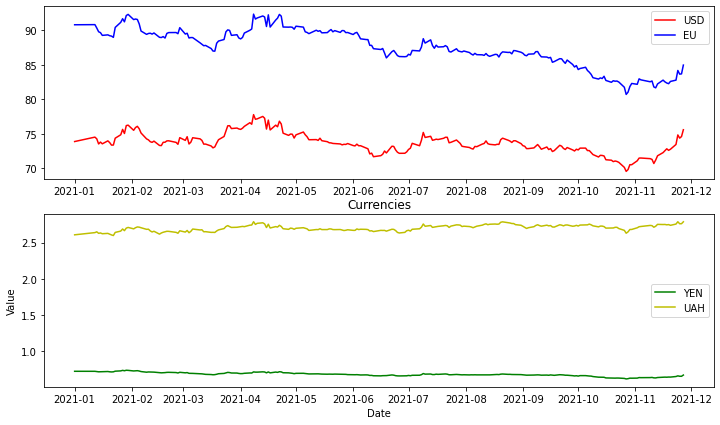

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(12, 7))
axes[0].plot(Date, usdValue, '-r')
axes[0].plot(Date, euroValue, '-b')
axes[0].legend(['USD','EU'])
axes[1].plot(Date, uenaValue, '-g', label='YEN')
axes[1].plot(Date, grivnaValue, '-y', label='UAH')
axes[1].legend(['YEN','UAH'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Currencies')
plt.legend()
plt.show()

# 2. Общие задачи по Numpy & matplotlib
### 2.1 Вычислить функцию:
### $$f(\stackrel\rightarrow x, \stackrel\rightarrow \omega, b) = \stackrel\rightarrow x\cdot\stackrel\rightarrow \omega + b = \sum\limits_{i=1}^n \omega_i x_i + b$$

In [15]:
import numpy as np

In [16]:
def f (vecX, vecW, b):
    vecXW = vecX * vecW
    return vecXW.sum()+b

In [17]:
x = np.fromstring(input("Input X: "), dtype=int, sep=' ')
w = np.fromstring(input("Input W: "), dtype=int, sep=' ')
b = float(input("Input b: "))

print("Result: ", f(x, w, b), '\n')

Input X: 1 2 3
Input W: 2 2 2
Input b: 3
Result:  15.0 



### 2.2 На отрезке [-5;5] построить графики функций:
### $$f(x)=x-\frac{x^3}{6}+\frac{x^5}{120}-\frac{x^7}{5040}$$
### $$g(x)=\sin (x)$$

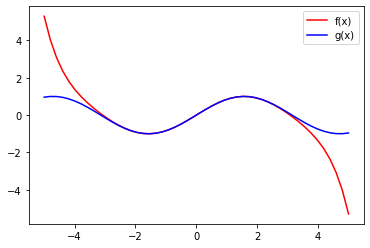

In [18]:
x = np.linspace(-5,5)
f = x - x**3/6 + x**5/120 - x**7/5040
g = np.sin(x)
plt.plot(x,f,'r',label = 'f(x)')
plt.plot(x,g,'b',label = 'g(x)')
plt.legend()
plt.show()

### 2.3 Нарисовать в matplotlib окружность заданного радиуса r.

Input r: 6


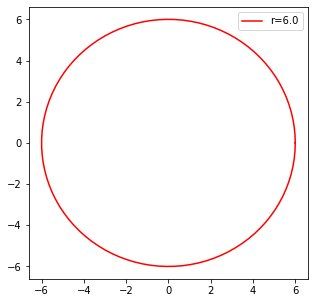

In [19]:
r = float(input('Input r: '))
t = np.linspace(0,np.pi*2,100)
plt.figure(figsize=(5,5))
plt.plot(np.cos(t)*r,np.sin(t)*r,'r',label = f'r={r}')
plt.legend()
plt.show()

### 2.4 Написать функцию transformation_plot, принимающую на вход набор двумерных точек и квадратную матрицу размером 2x2. 
Отрисуйте на одном графике оригинальные точки, на втором - точки после преобразования при помощи матрицы. Отобразите точки таким образом, чтобы было понятно, какая из точек на первом графике соответствует какой точке на втором.

In [20]:
def transformation_plot(x,matrix):
    result = np.empty((countOfDots,2))
    for i in range(countOfDots):
        result[i] = x[i].dot(matrix)
    return result

Input count of dots: 13
Input the matrix:1 2 3 4


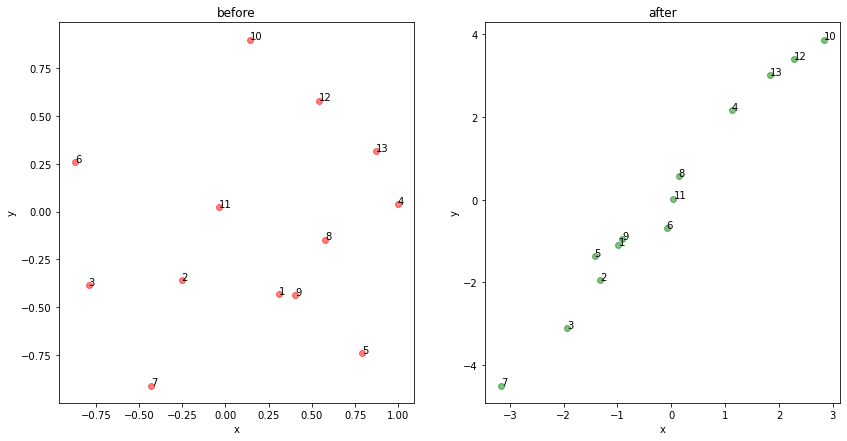

In [21]:
countOfDots = int(input("Input count of dots: "))
matrix =np.matrix(np.fromstring(input("Input the matrix:"),dtype=float, sep=' ').reshape(2,2))
x = np.random.uniform(low=-1, high=1, size=(countOfDots,2))
new_x = transformation_plot(x,matrix)

fig, axes = plt.subplots(1,2,figsize=(14, 7))
for i in range(countOfDots):
    axes[0].plot(x[i,0],x[i,1], "ro", alpha = 0.5)
    axes[0].text(x[i,0], x[i,1], f'{i+1}')
    axes[1].plot(new_x[i,0],new_x[i,1], "go", alpha = 0.5)
    axes[1].text(new_x[i,0], new_x[i,1], f'{i+1}')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('before')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('after')

plt.show()

### 2.5 Задайте некоторую функцию одной переменной f(x) (пример: sin(x), ln(x), x**2 + 2x + 1, …):
Отрисуйте график её производной на выбранном интервале [a,b], не используя её аналитическое выражение.
Сравните для проверки с аналитическим выражением производной.

In [22]:
def df(x):
    dx = 1e-5
    return (np.log(x+dx)-np.log(x))/dx

Input left border: 1
Input right border: 10


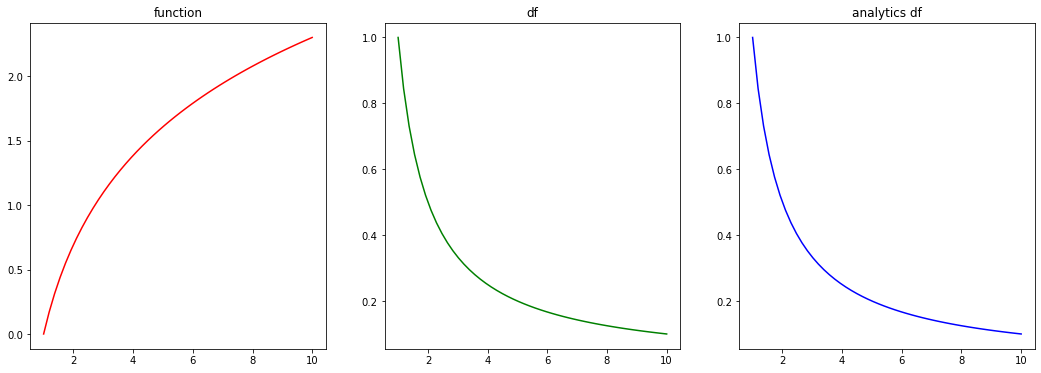

In [23]:
a = float(input('Input left border: '))
b = float(input('Input right border: '))
x = np.linspace(a,b)


fig, axes = plt.subplots(1,3,figsize=(18,6))
axes[0].plot(x,np.log(x),'r')
axes[1].plot(x,df(x),'g')
axes[2].plot(x,1/x,'b')

axes[0].set_title('function')
axes[1].set_title('df')
axes[2].set_title('analytics df')
plt.show()

### 2.6 Дано множество векторов V размерности d. Дан вектор q такой же размерности.
Определить:\
а) Пропорцию векторов v в V, для которых угол(v,q) < 90 градусов \
б) Пропорцию векторов v в V, для которых угол(v,q) < 30 градусов 


In [24]:
sizeV = int(input('Input size of V: '))
d = int(input('Input dimension: '))
quantityV = np.random.uniform(low=-10, high=10, size=(sizeV,d))
q = np.random.uniform(low=-20, high=20, size=d)
res_90 = 0
res_30 = 0
q = q/np.linalg.norm(q)
normV =np.linalg.norm(quantityV,axis=1).reshape(sizeV,1)
V = quantityV/normV
angles = np.arccos(np.clip(np.dot(V,q),-1.0,1.0))*180/np.pi
res_90 = (angles<90).sum()
res_30 = (angles<30).sum()
print('a) Proportion angle<90 =', res_90/sizeV)
print('b) Proportion angle<30 =', res_30/sizeV)

Input size of V: 100
Input dimension: 3
a) Proportion angle<90 = 0.48
b) Proportion angle<30 = 0.06


### 7. Дан гиперкуб и вписанная в него гиперсфера. 
Через сэмплинг точек внутри гиперкуба, оценить отношение объёма гиперсферы к объёму гиперкуба. Вывести график этой пропорции в зависимости от размерности пространства d.

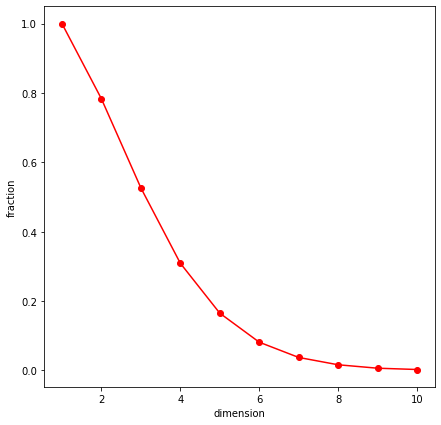

In [25]:
dim = 10
    
fig,ax =plt.subplots(1,1,figsize=(7,7))
fraction = []
for i in range(1,dim+1):
    total_points = 100000
    dots = np.random.uniform(low=-1, high=1, size=(total_points,i))
    norms = np.linalg.norm(dots,axis=1)
    points_inside = (norms <= 1).sum()
    fraction.append(points_inside/total_points)
ax.plot(range(1,dim+1),fraction,'-ro')
plt.xlabel('dimension')
plt.ylabel('fraction')
plt.show()